<a href="https://colab.research.google.com/github/Strivathsavashwin/solid-guide/blob/master/EDA_Heat_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
path = '/gdrive/My Drive/'

In [8]:
data = pd.read_csv(path + "Heat Data.csv")

In [9]:
data.head()

,City,State,Geo.ID,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,Historical Average Cost of Heat Event,Probability of Heat Event in 2040
0,Abilene,TX,1600000US4801000,0.322691,0.574485,0.070897,0.588600,0.439631,0.314172,0.120899,0.220609,0.601007,0,0.062842
1,Akron,OH,1600000US3901000,0.398229,0.493080,0.303378,0.736974,0.750813,0.507762,0.514565,0.514348,0.494373,0,0.158470
2,Albuquerque,NM,1600000US3502000,0.435242,0.599751,0.270733,0.489958,0.290455,0.631972,0.317515,0.795843,0.782557,1,0.101090
3,Alexandria,VA,1600000US5101000,0.687454,0.426660,0.948248,0.272741,0.419421,0.523200,0.362578,0.609321,0.597701,0,0.065574
4,Allentown,PA,1600000US4202000,0.758587,0.778669,0.738505,0.877971,0.320632,0.393285,0.425955,0.245751,0.508149,0,0.101090


In [11]:
data.shape

(278, 14)

Missing values

In [13]:
data.isnull().sum()

City                                     0
State                                    0
Geo.ID                                   0
Risk                                     0
Vulnerability                            0
Exposure                                 0
Sensitivity                              0
Adaptive Capacity                        0
Readiness                                0
Social                                   0
Governance                               0
Economic                                 0
Historical Average Cost of Heat Event    0
Probability of Heat Event in 2040        6
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   City                                   278 non-null    object 
 1   State                                  278 non-null    object 
 2   Geo.ID                                 278 non-null    object 
 3   Risk                                   278 non-null    float64
 4   Vulnerability                          278 non-null    float64
 5   Exposure                               278 non-null    float64
 6   Sensitivity                            278 non-null    float64
 7   Adaptive Capacity                      278 non-null    float64
 8   Readiness                              278 non-null    float64
 9   Social                                 278 non-null    float64
 10  Governance                             278 non-null    float64
 11  Econom

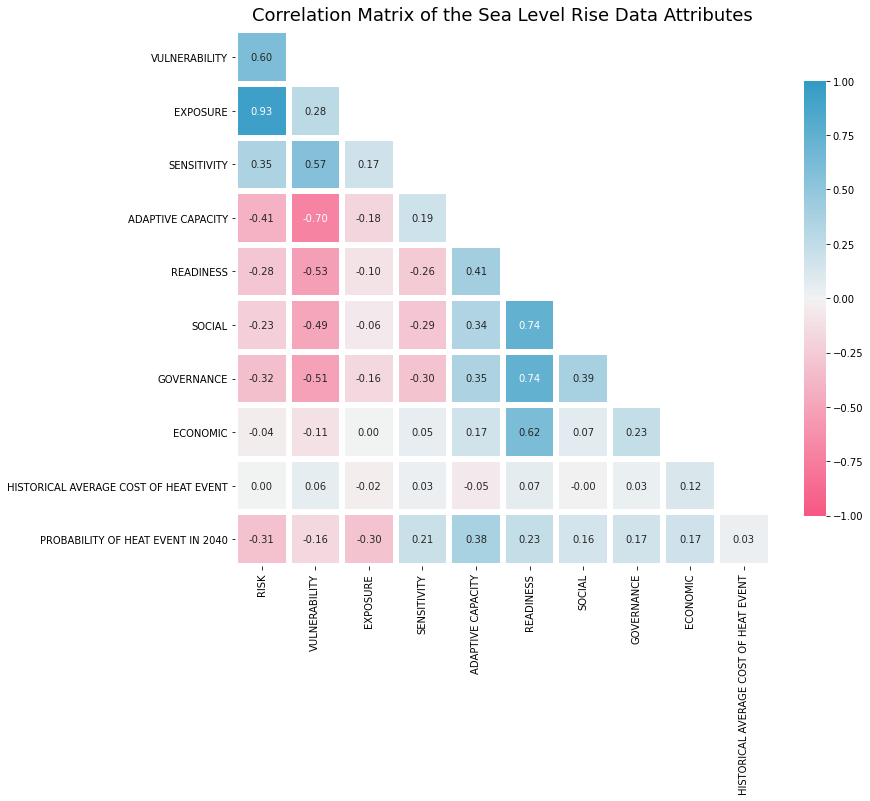

In [17]:
data_corr = data.corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))
# adjust mask and data
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Matrix of the Sea Level Rise Data Attributes'
plt.title(title, fontsize=18, pad = 10)
plt.show()